# Kaggle Titanic Demo1.3 KNN

In [1]:
import pylab as plt
%matplotlib inline
import numpy as np
import pandas as pd
import math

from featureEngineering6 import feature_engineering
from plot_learning_curve import plot_learning_curve

Kaggle_train=pd.read_csv('data/train.csv', sep=',')
Kaggle_test=pd.read_csv('data/test.csv', sep=',')

df_train, df_test = feature_engineering(Kaggle_train, Kaggle_test)

feature= ['Pclass','FamilySurvived', 'FamilyDied',
           'Title_s_Master', 'Title_s_Miss', 'Title_s_Mr', 'Title_s_Mrs',
          ]

# Acc: 0.886 +/- 0.017, F1: 0.842 +/- 0.025 # with max_depth = 4
# KS-0.81340 by max_depth=3

X, y = df_train[feature], Kaggle_train['Survived']

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 25 days


In [2]:
X.head()

,Pclass,FamilySurvived,FamilyDied,Title_s_Master,Title_s_Miss,Title_s_Mr,Title_s_Mrs
0,3,0,2,0,0,1,0
1,1,1,0,0,0,0,1
2,3,0,0,0,1,0,0
3,1,1,1,0,0,0,1
4,3,0,0,0,0,1,0


In [3]:
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.grid_search import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Train, Test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
pipe = Pipeline([
        ('scaler', StandardScaler()),
        #('pca', KernelPCA(kernel='rbf')),
        ('clf', KNeighborsClassifier())
        #('clf', KNeighborsClassifier())
    ])


n_neighbors_range = [12,16, 20]

param_grid = [
    {
        'clf__n_neighbors': n_neighbors_range,
    }
]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=8,
                  #verbose=3,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

print gs.best_score_

print gs.best_params_

0.869382022472
{'clf__n_neighbors': 16}


In [11]:
clf = gs.best_estimator_

In [12]:
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform'))])

In [13]:
print( 'Training Acc: %.3f' % accuracy_score(clf.predict(X_train), y_train))
print( 'Training Precision: %.3f' % precision_score(clf.predict(X_train), y_train))
print( 'Training Recall: %.3f' % recall_score(clf.predict(X_train), y_train))
print( 'Training F1: %.3f' % f1_score(clf.predict(X_train), y_train))

Training Acc: 0.878
Training Precision: 0.706
Training Recall: 0.960
Training F1: 0.814


In [14]:
print( 'Test Acc: %.3f' % accuracy_score(clf.predict(X_test), y_test))
print( 'Test Precision: %.3f' % precision_score(clf.predict(X_test), y_test))
print( 'Test Recall: %.3f' % recall_score(clf.predict(X_test), y_test))
print( 'Test F1: %.3f' % f1_score(clf.predict(X_test), y_test))

Test Acc: 0.810
Test Precision: 0.603
Test Recall: 0.898
Test F1: 0.721


## Model evaluation

In [15]:
scores = cross_validation.cross_val_score(clf, X, y, scoring='accuracy', cv=8, n_jobs=-1)
print('Cross validation check for Acc: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Cross validation check for Acc: 0.875 +/- 0.018


In [22]:
scores = cross_validation.cross_val_score(clf, X, y, scoring='f1', cv=8, n_jobs=-1)
print('Cross validation check for F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Cross validation check for F1: 0.826 +/- 0.028


In [17]:
scores = cross_validation.cross_val_score(clf, X, y, scoring='roc_auc', cv=8, n_jobs=-1)
print('Cross validation check for ROC AUC: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Cross validation check for ROC AUC: 0.903 +/- 0.016


In [18]:
from plot_learning_curve import plot_learning_curve

<module 'matplotlib.pyplot' from '/Users/fuyangliu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

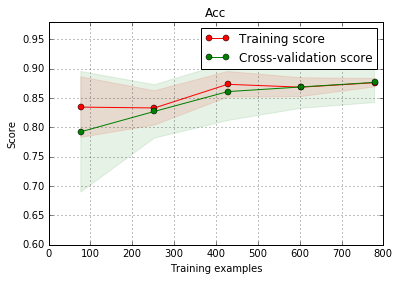

In [19]:
plot_learning_curve(clf, 'Acc', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')

<module 'matplotlib.pyplot' from '/Users/fuyangliu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

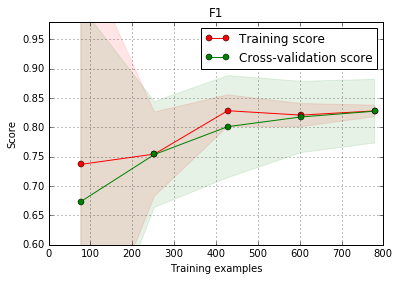

In [20]:
plot_learning_curve(clf, 'F1', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='f1')

<module 'matplotlib.pyplot' from '/Users/fuyangliu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

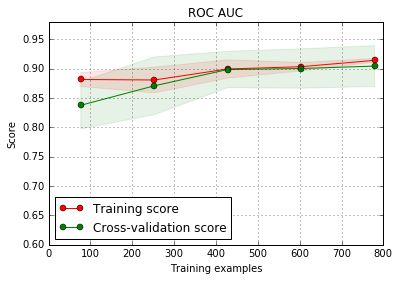

In [21]:
plot_learning_curve(clf, 'ROC AUC', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='roc_auc')

## Prediction

In [23]:
gs = gs.fit(X, y)

print gs.best_score_

print gs.best_params_

0.875420875421
{'clf__n_neighbors': 12}


In [ ]:
clf = gs.best_estimator_

In [ ]:
predictions = clf.predict(df_test[feature])

In [ ]:
submission = pd.DataFrame({
        "PassengerId": Kaggle_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv("Demo1.3-KNN.csv", index=False)

### This gives Kaggle score: 0.794
